In [11]:
import json, os
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
TEST_ITERATION = 1

In [15]:
folder = f"../results/{TEST_ITERATION}"

file_names = os.listdir(folder)

results = []
for file_name in file_names:
	if file_name.startswith("_") or not file_name.endswith(".json"):
		continue
	with open(os.path.join(folder, file_name), "r") as file:
		data = json.load(file)
		results.append(data)

In [16]:
results[0]

{'fileName': 'vc_25_150_06.txt',
 'graph': {'n': 25, 'm': 150, 'd': 0.5},
 'problemClass': 'SPI',
 'testInstanceName': '150',
 'testInstanceVersion': '06.txt',
 'performanceMetrics': {'generations': [{'best': 364.0,
    'objective': 364,
    'avg': 674.58,
    'evals': 159},
   {'best': 359.0, 'objective': 359, 'avg': 567.81, 'evals': 229},
   {'best': 342.0, 'objective': 342, 'avg': 487.97, 'evals': 291},
   {'best': 243.0, 'objective': 243, 'avg': 424.55, 'evals': 344},
   {'best': 243.0, 'objective': 199, 'avg': 379.88, 'evals': 406},
   {'best': 218.0, 'objective': 199, 'avg': 348.06, 'evals': 463},
   {'best': 210.0, 'objective': 137, 'avg': 306.96, 'evals': 516},
   {'best': 160.0, 'objective': 137, 'avg': 289.82, 'evals': 581},
   {'best': 160.0, 'objective': 114, 'avg': 265.92, 'evals': 639},
   {'best': 160.0, 'objective': 160, 'avg': 247.66, 'evals': 698},
   {'best': 157.0, 'objective': 157, 'avg': 242.94, 'evals': 760},
   {'best': 160.0, 'objective': 132, 'avg': 222.2, 'ev

In [4]:
for generations in results:
	continue
	df = pd.DataFrame(generations["performanceMetrics"]["generations"])
	plt.figure(figsize=(10, 5))
	plt.plot(df.index, df["best"], label="Best Fitness", marker='o')
	plt.plot(df.index, df["avg"], label="Average Fitness", marker='s')
	plt.xlabel("Generations")
	plt.ylabel("Fitness")
	plt.title("GA Evolution: Best vs Average Fitness")
	plt.legend()
	plt.grid()
	plt.show()

# ITERATION N° 1

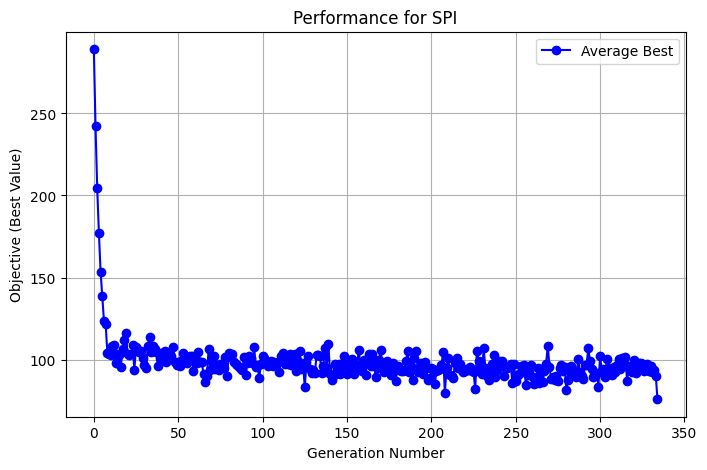

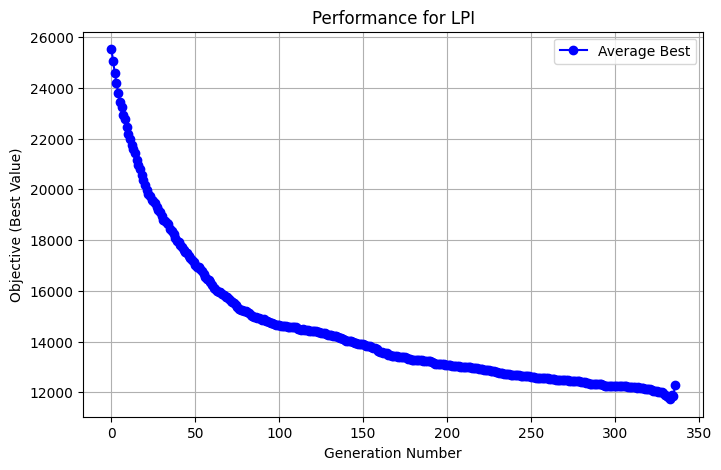

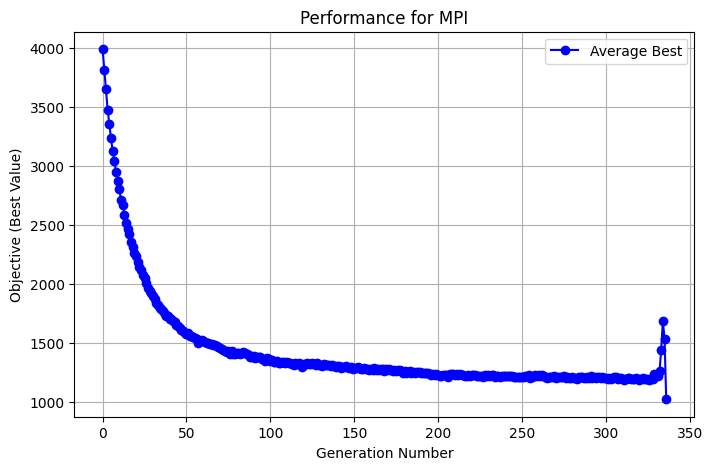

In [17]:
problem_classes = {}

import numpy as np
for entry in results:
    problem_class = entry['problemClass']# + "_" + entry['testInstanceName']
    generations = entry['performanceMetrics']['generations']
    
    if problem_class not in problem_classes:
        problem_classes[problem_class] = []
    
    # Extract the best fitness values per generation
    problem_classes[problem_class].append([gen['objective'] for gen in generations])

output_dir = f"../results/{TEST_ITERATION}/plots"
os.makedirs(output_dir, exist_ok=True)
    

# Generate plots
for problem_class, fitness_lists in problem_classes.items():
    # Ensure all series have the same length
    max_generations = max(len(lst) for lst in fitness_lists)
    
    # Convert lists to numpy arrays, padding with NaNs for missing values
    fitness_arrays = np.array([lst + [np.nan] * (max_generations - len(lst)) for lst in fitness_lists])
    
    # Compute min, max, and average across all instances for each generation
    #gen_min = np.nanmin(fitness_arrays, axis=0)
    #gen_max = np.nanmax(fitness_arrays, axis=0)
    gen_avg = np.nanmean(fitness_arrays, axis=0)
    
    # Plot min-max range
    plt.figure(figsize=(8, 5))
    generations = np.arange(max_generations)
    #plt.fill_between(generations, gen_min, gen_max, alpha=0.2, label='Min-Max Range', color='gray')
    plt.plot(generations, gen_avg, marker='o', linestyle='-', label='Average Best', color='blue')

    plt.title(f'Performance for {problem_class}')
    plt.xlabel('Generation Number')
    plt.ylabel('Objective (Best Value)')
    plt.legend()
    plt.grid()

    file_path = os.path.join(output_dir, f"objective_generation_{problem_class}.jpg")
    plt.savefig(file_path, format='jpg', dpi=300)
    
    plt.show()